# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('punkt')
nltk.download('vader_lexicon')
!pip install wordcloud
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JAY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JAY\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Loading Data

In [2]:
columns = ['ID','Entity','Sentiment','Text']

train_data = pd.read_csv("D:\\movies\\projects\\Prodigy Projects\\twitter\\twitter_training.csv",names=columns)
validation_data = pd.read_csv("D:\\movies\\projects\\Prodigy Projects\\twitter\\twitter_validation.csv",names=columns)

In [3]:
train_data

,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
validation_data

,ID,Entity,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
# Concatenate the datasets for analysis
data = pd.concat([train_data, validation_data], ignore_index=True)

In [6]:
data.head()

,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
data.shape

(75682, 4)

# Handling Missing data

In [8]:
data.isnull().sum()

ID             0
Entity         0
Sentiment      0
Text         686
dtype: int64

In [9]:
data.dropna(subset=['Text'], inplace=True)

In [10]:
data.shape

(74996, 4)

# Sentiment Distribution

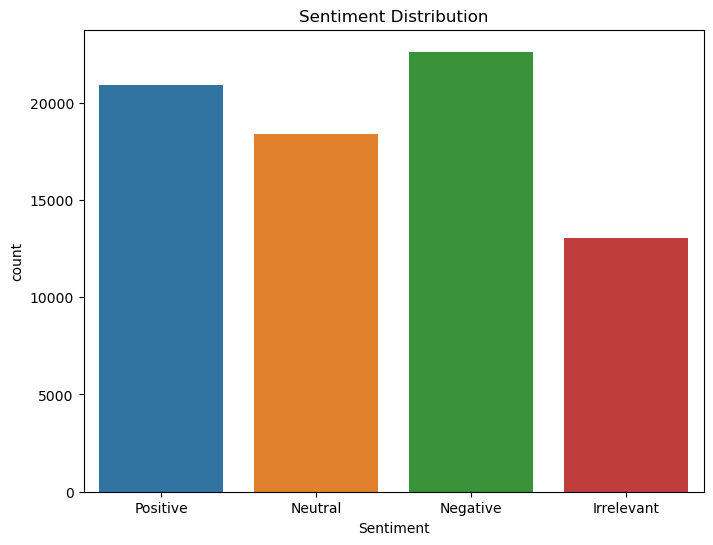

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data)
plt.title("Sentiment Distribution")
plt.show()

# Top 10 Twitter Entity Distribution

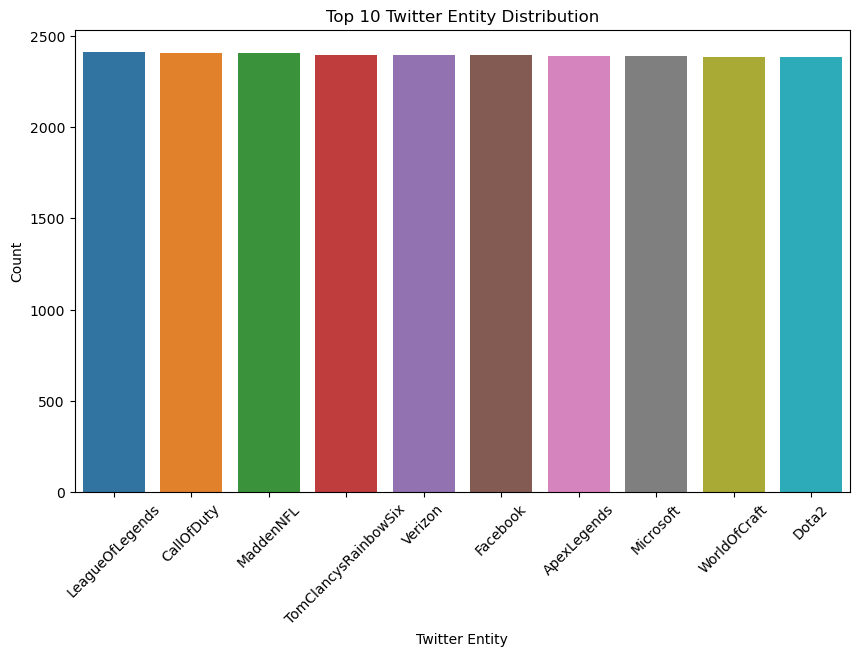

In [12]:
top_entities = data['Entity'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_entities.index, y=top_entities.values)
plt.title("Top 10 Twitter Entity Distribution")
plt.xlabel("Twitter Entity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Word Clouds

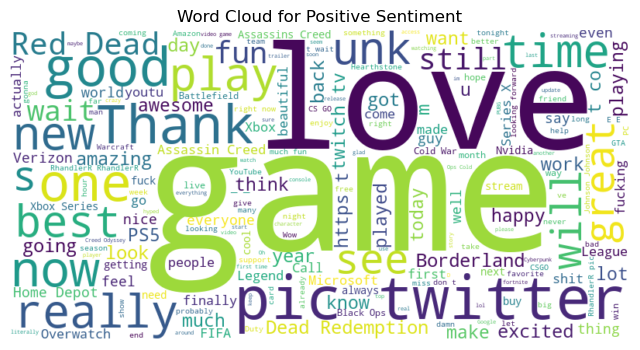

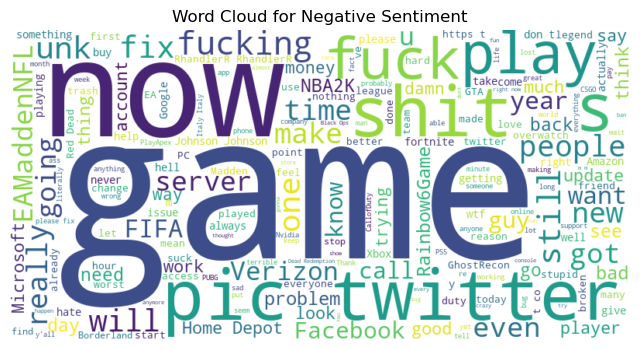

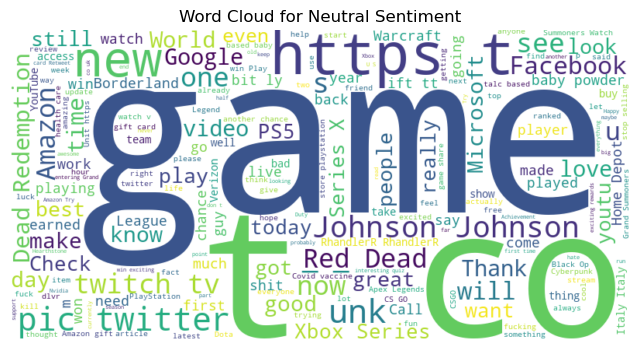

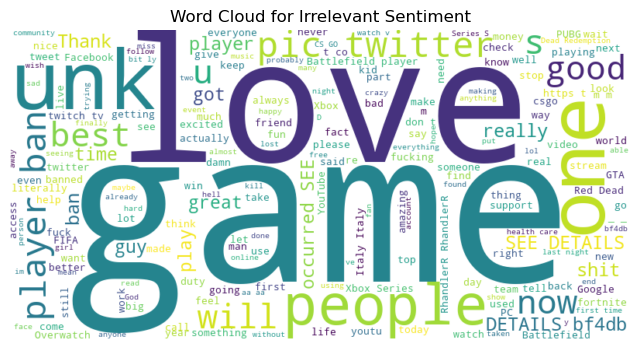

In [13]:
# Define a function to generate word cloud for a specific sentiment
def generate_wordcloud(sentiment, text_data):
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

# Filter data by sentiment
positive_text = data[data['Sentiment'] == 'Positive']['Text'].str.cat(sep=' ')
negative_text = data[data['Sentiment'] == 'Negative']['Text'].str.cat(sep=' ')
neutral_text = data[data['Sentiment'] == 'Neutral']['Text'].str.cat(sep=' ')
irrelevant_text = data[data['Sentiment'] == 'Irrelevant']['Text'].str.cat(sep=' ')

# Generate word clouds for each sentiment
generate_wordcloud('Positive', positive_text)
generate_wordcloud('Negative', negative_text)
generate_wordcloud('Neutral', neutral_text)
generate_wordcloud('Irrelevant', irrelevant_text)

# Text Analysis

In [14]:
#Using NLP preprocessing
stop_words = set(stopwords.words('english'))
analyzer = SentimentIntensityAnalyzer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

data['Processed Text'] = data['Text'].apply(preprocess_text)
data['Sentiment Score'] = data['Processed Text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

#processed text and sentiment score
print("\nProcessed Text and Sentiment Score:")
print(data[['Processed Text', 'Sentiment Score']].head())


Processed Text and Sentiment Score:
                    Processed Text  Sentiment Score
0    im getting borderlands murder          -0.6908
1              coming borders kill          -0.6908
2      im getting borderlands kill          -0.6908
3     im coming borderlands murder          -0.6908
4  im getting borderlands 2 murder          -0.6908
